In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Display all the columns in a dataset

pd.set_option("display.max_columns", None)

import catboost
import sklearn

In [2]:
AutoIns = pd.read_excel(r"D:\downloads\Auto_Insurance_Data V 1.0 (1).xlsx", header=0)
AutoIns.head()

,Rec_ID,Policy_number,Agent_Type,Process_Dt,Days_Process_Bind,Bind_Dt,Eff_Dt,Renewal_Dt,State,Policy_Type,NW_Premium,Taxes,GW_Premium,Num_Drivers,Num_Vehicles,Gender,Age,Driving_Exp,Prev_Accidents,Prev_Citations,Marital_Status,Education,Sal_Range,Coverage,Veh_Usage,Annual_Miles_Range,Vehicle_Cost_Range,Claims_Amount_Range
0,1,123459912,EA,2021-05-27,20,2021-06-16,2021-06-16,2021-12-14,CA,Car,1388.180516,25.00000,1413.180516,2,3,Female,65,47,0,1,1,4,2,1,2,2,4,0
1,2,123673362,EA,2021-02-26,8,2021-03-06,2021-03-06,2021-09-03,OR,Car,1175.964000,23.51928,1199.483280,1,1,Male,56,38,0,1,3,4,5,1,1,1,3,0
2,3,123978119,EA,2021-07-01,5,2021-07-06,2021-07-06,2022-01-03,OR,Van,1657.415855,25.00000,1682.415855,1,2,Female,21,3,0,1,3,1,4,1,2,6,1,0
3,4,123663280,EA,2021-06-22,2,2021-06-24,2021-06-24,2021-12-22,AZ,Car,1104.175500,22.08351,1126.259010,1,2,Male,29,11,0,0,1,3,2,1,1,8,3,0
4,5,123686557,EA,2021-07-03,20,2021-07-23,2021-07-23,2022-01-20,OR,Car,1066.758023,21.33516,1088.093184,2,2,Female,48,30,0,0,1,1,7,1,3,5,3,0


In [3]:
AutoIns.shape

(37492, 28)

In [4]:
AutoIns.isnull().sum()

Rec_ID                 0
Policy_number          0
Agent_Type             0
Process_Dt             0
Days_Process_Bind      0
Bind_Dt                0
Eff_Dt                 0
Renewal_Dt             0
State                  0
Policy_Type            0
NW_Premium             0
Taxes                  0
GW_Premium             0
Num_Drivers            0
Num_Vehicles           0
Gender                 0
Age                    0
Driving_Exp            0
Prev_Accidents         0
Prev_Citations         0
Marital_Status         0
Education              0
Sal_Range              0
Coverage               0
Veh_Usage              0
Annual_Miles_Range     0
Vehicle_Cost_Range     0
Claims_Amount_Range    0
dtype: int64

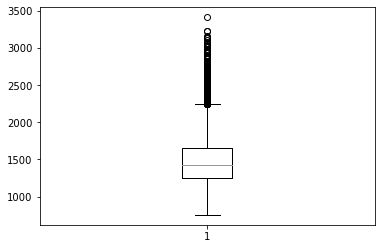

In [5]:
from scipy.stats import norm 
plt.boxplot(AutoIns['GW_Premium'])
plt.show()

In [6]:
first_quantile = AutoIns['GW_Premium'].quantile(0.25)
third_quantile = AutoIns['GW_Premium'].quantile(0.75)
iqr = third_quantile - first_quantile

In [7]:
upper_bound = round(third_quantile + 1.5*iqr,3)
print(upper_bound)
lower_bound = round(first_quantile - 1.5*iqr,3)
print(lower_bound)


2240.695
658.854


In [8]:
AutoIns[(AutoIns['GW_Premium']>upper_bound) | (AutoIns['GW_Premium']<lower_bound)]

,Rec_ID,Policy_number,Agent_Type,Process_Dt,Days_Process_Bind,Bind_Dt,Eff_Dt,Renewal_Dt,State,Policy_Type,NW_Premium,Taxes,GW_Premium,Num_Drivers,Num_Vehicles,Gender,Age,Driving_Exp,Prev_Accidents,Prev_Citations,Marital_Status,Education,Sal_Range,Coverage,Veh_Usage,Annual_Miles_Range,Vehicle_Cost_Range,Claims_Amount_Range
11,12,123635220,EA,2021-01-18,31,2021-02-18,2021-02-18,2021-08-18,NV,Car,2280.230815,25.0,2305.230815,1,1,Male,20,2,0,1,3,2,4,3,3,4,2,0
31,32,123809269,EA,2021-06-27,14,2021-07-11,2021-07-11,2022-01-08,NV,Truck,2273.439907,25.0,2298.439907,3,2,Female,21,3,1,0,3,1,3,1,3,3,7,5
105,106,123739738,EA,2021-03-02,22,2021-03-24,2021-03-24,2021-09-21,CA,Car,2409.950154,25.0,2434.950154,2,1,Male,20,2,0,1,3,2,1,2,3,2,3,0
119,120,123960868,EA,2021-04-27,31,2021-05-28,2021-05-28,2021-11-25,AZ,Truck,2783.155069,25.0,2808.155069,1,1,Male,65,47,1,1,3,1,3,2,3,1,6,4
314,315,123853980,EA,2021-03-03,15,2021-03-18,2021-03-18,2021-09-15,CA,Van,2414.533770,25.0,2439.533770,2,2,Male,21,3,1,1,1,1,4,2,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37246,37247,123667030,EA,2021-04-06,3,2021-04-09,2021-04-09,2021-10-07,AZ,Van,2355.746887,25.0,2380.746887,1,1,Male,18,0,1,1,2,1,3,1,1,5,3,3
37282,37283,123495490,EA,2021-06-27,22,2021-07-19,2021-07-19,2022-01-16,CA,Van,2329.779067,25.0,2354.779067,2,1,Female,42,24,0,1,3,3,4,3,3,8,2,0
37334,37335,123937146,IA,2021-02-04,16,2021-02-20,2021-02-20,2021-08-20,CA,Car,2217.282677,25.0,2242.282677,1,2,Male,52,34,0,1,4,1,2,3,3,5,4,0
37412,37413,123634922,IA,2021-01-21,20,2021-02-10,2021-02-10,2021-08-10,CA,Truck,2325.532172,25.0,2350.532172,2,1,Female,33,15,1,1,3,1,7,3,2,1,3,4


In [9]:
AutoIns.shape

(37492, 28)

In [10]:
AutoIns_out = AutoIns[(AutoIns['GW_Premium'] < upper_bound) & (AutoIns['GW_Premium'] > lower_bound)]
AutoIns_out.shape

(36752, 28)

In [11]:
AutoIns.shape[0]-AutoIns_out.shape[0]

740

In [12]:
AutoIns = AutoIns.drop(['Rec_ID','Policy_number','Process_Dt','Days_Process_Bind','Bind_Dt','Eff_Dt','Renewal_Dt','Renewal_Dt','NW_Premium','Taxes','Claims_Amount_Range'],axis=1)

In [13]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37492 entries, 0 to 37491
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Agent_Type          37492 non-null  object 
 1   State               37492 non-null  object 
 2   Policy_Type         37492 non-null  object 
 3   GW_Premium          37492 non-null  float64
 4   Num_Drivers         37492 non-null  int64  
 5   Num_Vehicles        37492 non-null  int64  
 6   Gender              37492 non-null  object 
 7   Age                 37492 non-null  int64  
 8   Driving_Exp         37492 non-null  int64  
 9   Prev_Accidents      37492 non-null  int64  
 10  Prev_Citations      37492 non-null  int64  
 11  Marital_Status      37492 non-null  int64  
 12  Education           37492 non-null  int64  
 13  Sal_Range           37492 non-null  int64  
 14  Coverage            37492 non-null  int64  
 15  Veh_Usage           37492 non-null  int64  
 16  Annu

In [14]:
AutoIns = pd.get_dummies(AutoIns, columns=['Agent_Type','Policy_Type','Gender'])

In [15]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37492 entries, 0 to 37491
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               37492 non-null  object 
 1   GW_Premium          37492 non-null  float64
 2   Num_Drivers         37492 non-null  int64  
 3   Num_Vehicles        37492 non-null  int64  
 4   Age                 37492 non-null  int64  
 5   Driving_Exp         37492 non-null  int64  
 6   Prev_Accidents      37492 non-null  int64  
 7   Prev_Citations      37492 non-null  int64  
 8   Marital_Status      37492 non-null  int64  
 9   Education           37492 non-null  int64  
 10  Sal_Range           37492 non-null  int64  
 11  Coverage            37492 non-null  int64  
 12  Veh_Usage           37492 non-null  int64  
 13  Annual_Miles_Range  37492 non-null  int64  
 14  Vehicle_Cost_Range  37492 non-null  int64  
 15  Agent_Type_EA       37492 non-null  uint8  
 16  Agen

In [16]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
AutoIns['State']=le.fit_transform(AutoIns['State'])

In [17]:
AutoIns['Age'] = pd.cut(AutoIns['Age'], [0, 2, 25, 35, 45, 55, 65, 75], 
 labels=['<=20', '>20 & <=25', '>25 & <=35 ', '>35 & <=45', '>45 & <=55', '>55 & <=65','>65'])

In [18]:
AutoIns['Driving_Exp'] = pd.cut(AutoIns['Driving_Exp'], [-1, 0, 3, 7, 11, 16, 21, 80],
labels=['0', '<=3', '>3 & <=7', '>7 & <=11', '>11 & <=16', '>16 & <=21', '>21'])                    

In [19]:
AutoIns['Age']=AutoIns['Age'].str.replace('>65','1')
AutoIns['Age']=AutoIns['Age'].str.replace('>55 & <=65','2')
AutoIns['Age']=AutoIns['Age'].str.replace('>45 & <=55','3')
AutoIns['Age']=AutoIns['Age'].str.replace('>35 & <=45','4')
AutoIns['Age']=AutoIns['Age'].str.replace('>25 & <=35','5')
AutoIns['Age']=AutoIns['Age'].str.replace('>20 & <=25','6')
AutoIns['Age']=AutoIns['Age'].str.replace('<= 20','7')
AutoIns['Age']=AutoIns['Age'].astype(int)

In [20]:
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].str.replace('<=3','1')
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].str.replace('>3 & <=7','2')
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].str.replace('>7 & <=11','3')
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].str.replace('>11 & <=16','4')
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].str.replace('>16 & <=21','5')
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].str.replace('>21','6')
AutoIns['Driving_Exp']=AutoIns['Driving_Exp'].astype(int)

In [21]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37492 entries, 0 to 37491
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               37492 non-null  int32  
 1   GW_Premium          37492 non-null  float64
 2   Num_Drivers         37492 non-null  int64  
 3   Num_Vehicles        37492 non-null  int64  
 4   Age                 37492 non-null  int32  
 5   Driving_Exp         37492 non-null  int32  
 6   Prev_Accidents      37492 non-null  int64  
 7   Prev_Citations      37492 non-null  int64  
 8   Marital_Status      37492 non-null  int64  
 9   Education           37492 non-null  int64  
 10  Sal_Range           37492 non-null  int64  
 11  Coverage            37492 non-null  int64  
 12  Veh_Usage           37492 non-null  int64  
 13  Annual_Miles_Range  37492 non-null  int64  
 14  Vehicle_Cost_Range  37492 non-null  int64  
 15  Agent_Type_EA       37492 non-null  uint8  
 16  Agen

In [22]:
AutoIns.head()

,State,GW_Premium,Num_Drivers,Num_Vehicles,Age,Driving_Exp,Prev_Accidents,Prev_Citations,Marital_Status,Education,Sal_Range,Coverage,Veh_Usage,Annual_Miles_Range,Vehicle_Cost_Range,Agent_Type_EA,Agent_Type_IA,Policy_Type_Car,Policy_Type_Truck,Policy_Type_Van,Gender_Female,Gender_Male
0,1,1413.180516,2,3,2,6,0,1,1,4,2,1,2,2,4,1,0,1,0,0,1,0
1,3,1199.483280,1,1,2,6,0,1,3,4,5,1,1,1,3,1,0,1,0,0,0,1
2,3,1682.415855,1,2,6,1,0,1,3,1,4,1,2,6,1,1,0,0,0,1,1,0
3,0,1126.259010,1,2,5,3,0,0,1,3,2,1,1,8,3,1,0,1,0,0,0,1
4,3,1088.093184,2,2,3,6,0,0,1,1,7,1,3,5,3,1,0,1,0,0,1,0


In [23]:
IndepVar = []
for col in AutoIns.columns:
     if col != 'GW_Premium':
        IndepVar.append(col)
TargetVar = 'GW_Premium'
x = AutoIns[IndepVar]
y = AutoIns[TargetVar]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [25]:
cols=['State','Num_Drivers','Num_Vehicles','Age','Driving_Exp','Prev_Accidents','Prev_Citations','Marital_Status','Education','Sal_Range','Coverage','Veh_Usage','Annual_Miles_Range','Vehicle_Cost_Range','Agent_Type_EA','Agent_Type_IA','Policy_Type_Car','Policy_Type_Truck','Policy_Type_Van','Gender_Female','Gender_Male']

In [26]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [27]:
AutoIns.isnull().sum()

State                 0
GW_Premium            0
Num_Drivers           0
Num_Vehicles          0
Age                   0
Driving_Exp           0
Prev_Accidents        0
Prev_Citations        0
Marital_Status        0
Education             0
Sal_Range             0
Coverage              0
Veh_Usage             0
Annual_Miles_Range    0
Vehicle_Cost_Range    0
Agent_Type_EA         0
Agent_Type_IA         0
Policy_Type_Car       0
Policy_Type_Truck     0
Policy_Type_Van       0
Gender_Female         0
Gender_Male           0
dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression

modelREG = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)  

modelREG.fit(x_train, y_train) 

# Predict the model with test dataset

y_pred = modelREG.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 79.197
Mean Squared Error (MSE): 10414.39
Root Mean Squared Error (RMSE): 102.051
Mean Absolute Percentage Error (MAPE): 5.4 %
R2_score: 0.890591
Adj R Square:  0.89053


In [29]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 min_impurity_split=None, ccp_alpha=0.0)

modelDTR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = modelDTR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 101.9
Mean Squared Error (MSE): 19782.631
Root Mean Squared Error (RMSE): 140.651
Mean Absolute Percentage Error (MAPE): 6.67 %
R2_score: 0.792173
Adj R Square:  0.792057


In [30]:
from sklearn.ensemble import RandomForestRegressor

bostonRFR = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                  bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
                                  verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

bostonRFR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = bostonRFR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 61.093
Mean Squared Error (MSE): 7345.368
Root Mean Squared Error (RMSE): 85.705
Mean Absolute Percentage Error (MAPE): 3.9800000000000004 %
R2_score: 0.922833
Adj R Square:  0.92279


In [31]:
from sklearn.svm import SVR

bostonSVR = SVR(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001,
                epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

bostonSVR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = bostonSVR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 80.622
Mean Squared Error (MSE): 11469.752
Root Mean Squared Error (RMSE): 107.097
Mean Absolute Percentage Error (MAPE): 5.35 %
R2_score: 0.879504
Adj R Square:  0.879436


In [32]:
from sklearn import neighbors

bostonKNN = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto',
                                          leaf_size=30, p=2, metric='minkowski',
                                          metric_params=None, n_jobs=None)
bostonKNN.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = bostonKNN.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 97.272
Mean Squared Error (MSE): 18148.068
Root Mean Squared Error (RMSE): 134.715
Mean Absolute Percentage Error (MAPE): 6.34 %
R2_score: 0.809345
Adj R Square:  0.809238


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
modelGBR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = modelGBR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),3))

# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 49.935
Mean Squared Error (MSE): 4880.706
Root Mean Squared Error (RMSE): 69.862
Mean Absolute Percentage Error (MAPE): 3.3000000000000003 %
R2_score: 0.949
Adj R Square:  0.949


In [34]:
import xgboost as xgb

modelXGR = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

modelXGR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = modelXGR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),3))

# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y_pred),3)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)
print('Adj R Square: ', adjusted_r_squared)

[15:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 83.736
Mean Squared Error (MSE): 13723.163
Root Mean Squared Error (RMSE): 117.146
Mean Absolute Percentage Error (MAPE): 5.3 %
R2_score: 0.856
Adj R Square:  0.856


In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Adaboost regressor

modelDT=DecisionTreeRegressor(max_depth=1)

modelABR = AdaBoostRegressor(n_estimators=50, base_estimator=modelDT ,learning_rate=1)

# Fit the model with train data

modelABR.fit(x_train,y_train)
y_pred = modelABR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred), 2) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),3))

# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y_pred),3)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 246.926
Mean Squared Error (MSE): 87574.705
Root Mean Squared Error (RMSE): 295.93
Mean Absolute Percentage Error (MAPE): 19.0 %
R2_score: 0.08
Adj R Square:  0.079


In [36]:
from sklearn.decomposition import PCA
modelPCA=PCA(n_components=2)
x1_train=modelPCA.fit_transform(x_train)
x1_test=modelPCA.transform(x_test)
explained_variance=modelPCA.explained_variance_ratio_
print(explained_variance)

[0.15287623 0.14511229]


In [37]:
from sklearn.linear_model import LinearRegression

modelREG = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)  

modelREG.fit(x1_train, y_train) 

# Predict the model with test dataset

y1_pred = modelREG.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y1_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 241.191
Mean Squared Error (MSE): 94882.968
Root Mean Squared Error (RMSE): 308.031
Mean Absolute Percentage Error (MAPE): 16.7 %
R2_score: 0.003205
Adj R Square:  0.002646


In [38]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 min_impurity_split=None, ccp_alpha=0.0)

modelDTR.fit(x1_train, y_train)

# Predict the model with test dataset

y_pred = modelDTR.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y1_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 241.191
Mean Squared Error (MSE): 94882.968
Root Mean Squared Error (RMSE): 308.031
Mean Absolute Percentage Error (MAPE): 16.68 %
R2_score: 0.003205
Adj R Square:  0.002646


In [39]:
from sklearn.ensemble import RandomForestRegressor

bostonRFR = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                  bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
                                  verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

bostonRFR.fit(x1_train, y_train)

# Predict the model with test dataset

y1_pred = bostonRFR.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y1_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 240.264
Mean Squared Error (MSE): 96069.051
Root Mean Squared Error (RMSE): 309.95
Mean Absolute Percentage Error (MAPE): 16.5 %
R2_score: -0.651962
Adj R Square:  -0.009821


In [40]:
from sklearn.svm import SVR

bostonSVR = SVR(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001,
                epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

bostonSVR.fit(x1_train, y_train)

# Predict the model with test dataset

y1_pred = bostonSVR.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y1_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 239.039
Mean Squared Error (MSE): 96960.632
Root Mean Squared Error (RMSE): 311.385
Mean Absolute Percentage Error (MAPE): 16.06 %
R2_score: -0.018622
Adj R Square:  -0.019193


In [41]:
from sklearn import neighbors

bostonKNN = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto',
                                          leaf_size=30, p=2, metric='minkowski',
                                          metric_params=None, n_jobs=None)
bostonKNN.fit(x1_train, y_train)

# Predict the model with test dataset

y1_pred = bostonKNN.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred),4) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),6))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y1_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 243.036
Mean Squared Error (MSE): 98376.82
Root Mean Squared Error (RMSE): 313.651
Mean Absolute Percentage Error (MAPE): 16.669999999999998 %
R2_score: -0.0335
Adj R Square:  -0.034079


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
modelGBR.fit(x1_train, y_train)

# Predict the model with test dataset

y1_pred = modelGBR.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),3))

# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y1_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 225.293
Mean Squared Error (MSE): 83671.69
Root Mean Squared Error (RMSE): 289.261
Mean Absolute Percentage Error (MAPE): 15.5 %
R2_score: 0.121
Adj R Square:  0.12


In [43]:
import xgboost as xgb

modelXGR = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

modelXGR.fit(x1_train, y_train)

# Predict the model with test dataset

y1_pred = modelXGR.predict(x1_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred), 3) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),3))

# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y1_pred),3)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)
print('Adj R Square: ', adjusted_r_squared)

[15:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 223.434
Mean Squared Error (MSE): 85689.182
Root Mean Squared Error (RMSE): 292.727
Mean Absolute Percentage Error (MAPE): 14.899999999999999 %
R2_score: 0.1
Adj R Square:  0.099


In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Adaboost regressor

modelDT=DecisionTreeRegressor(max_depth=1)

modelABR = AdaBoostRegressor(n_estimators=50, base_estimator=modelDT ,learning_rate=1)

# Fit the model with train data

modelABR.fit(x_train,y_train)
y1_pred = modelABR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y1_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y1_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y1_pred), 2) * 100, '%')
print('R2_score:', round(metrics.r2_score(y_test, y1_pred),3))

# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y1_pred),3)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 247.677
Mean Squared Error (MSE): 88114.952
Root Mean Squared Error (RMSE): 296.842
Mean Absolute Percentage Error (MAPE): 19.0 %
R2_score: 0.074
Adj R Square:  0.073
